In [308]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

In [309]:
X=df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']



In [310]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                shuffle = True,stratify=y,
                                                 random_state=0)#parametr dla zachowania proporcji

In [319]:
from sklearn.preprocessing import OrdinalEncoder
le = preprocessing.OrdinalEncoder()
X_train1 = le.fit_transform(X_train)
X_test1 = le.fit_transform(X_test)

In [320]:
Tree_classifier = DecisionTreeClassifier(max_depth = 14,min_samples_leaf=14)

In [321]:
Tree_classifier.fit(X_train1,y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=14)

In [322]:
y_pred = Tree_classifier.predict(X_test1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56279  1168]
 [ 5135   838]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     57447
         1.0       0.42      0.14      0.21      5973

    accuracy                           0.90     63420
   macro avg       0.67      0.56      0.58     63420
weighted avg       0.87      0.90      0.88     63420



In [291]:
import pickle
filename = 'modelTree100%accuracy.sav'
pickle.dump(Tree_classifier, open(filename, 'wb'))

In [292]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9006149479659413


In [123]:

names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

In [124]:
from sklearn import tree

In [125]:
import matplotlib.pyplot as plt

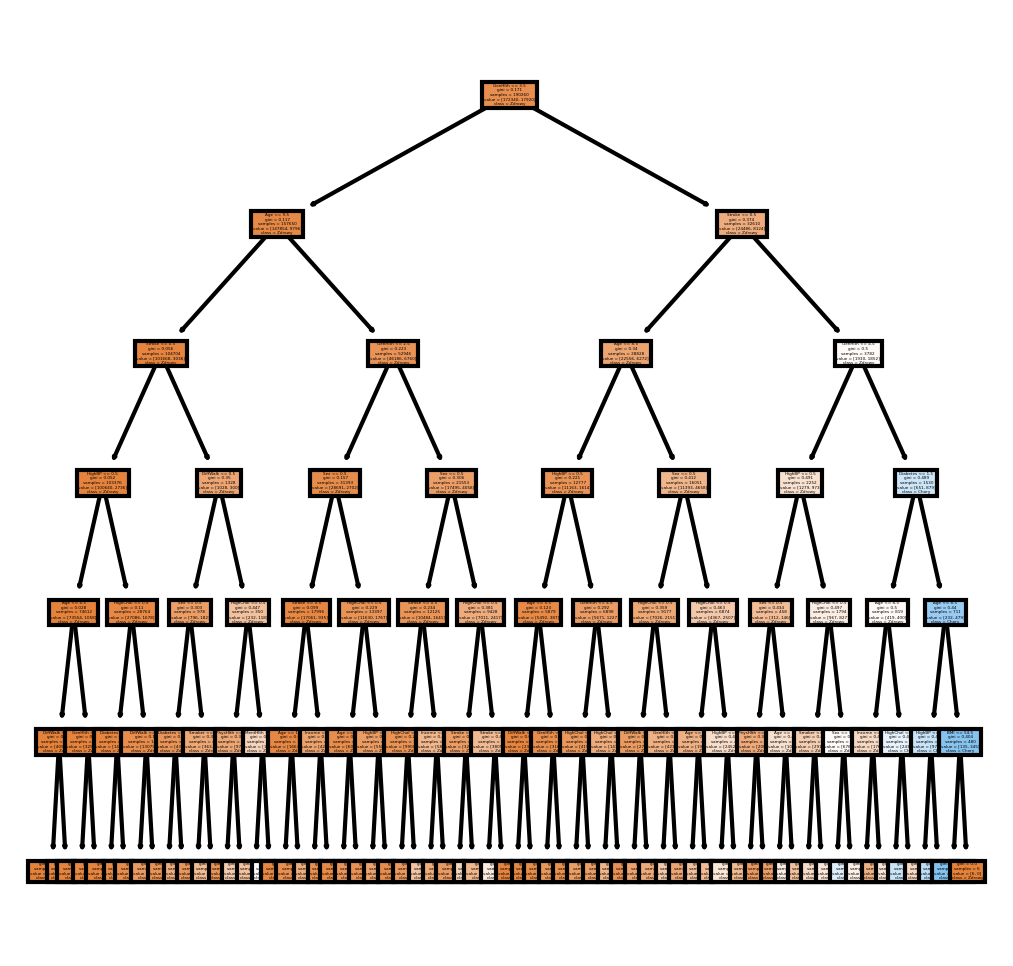

In [126]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(Tree_classifier,
               feature_names = names, 
               class_names=['Zdrowy','Chory'],
               filled = True)
fig.savefig('Drzewko.png')